In [41]:
import os
import numpy as np
import matplotlib
import cv2 as cv
import os
import tensorflow as tf
from tensorflow.keras import layers
import io
import seaborn as sns
import glob
import splitfolders
from google.cloud import storage
from matplotlib import pyplot as plt
from xml.dom import minidom
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from numpy import savez_compressed
from numpy import load
from sklearn.model_selection import train_test_split
from tensorflow.python.lib.io import file_io


# Config

Configuration of important paths.

In [42]:
raw_path = 'data/raw'
split_path = 'data/split'

# Data Exploration

## How does the dataset look like?

In [43]:
classes = os.listdir(raw_path)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
if '.gitignore' in classes:
    classes.remove('.gitignore')

print('There are ' + str(len(classes)) + ' different classes in this raw dataset.')
print('The class names are: ' + str(classes))

There are 3 different classes in this raw dataset.
The class names are: ['paper', 'rock', 'scissor']


In [44]:
imgs_path = []

for b in classes:
    img_path = os.listdir(raw_path + '/' + b)

    if '.DS_Store' in img_path:
        img_path.remove('.DS_Store')

    new_img_path = [raw_path + '/' + b + '/' + d for d in img_path]
    imgs_path.append(new_img_path)


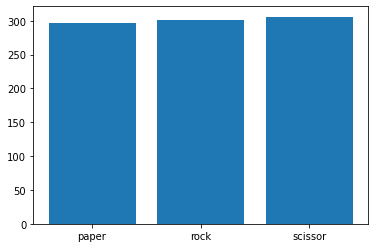

Minimum images per class: 296
Maximum images per class: 306
Total images across the dataset: 903


In [45]:
imgs_per_class = []

for b in range(len(classes)):
    imgs_per_class.append(len(imgs_path[b]))

plt.bar(classes, imgs_per_class)
plt.show()

print('Minimum images per class: ' + str(min(imgs_per_class)))
print('Maximum images per class: ' + str(max(imgs_per_class)))
print('Total images across the dataset: ' + str(sum(imgs_per_class)))

Lets take a look into some images:

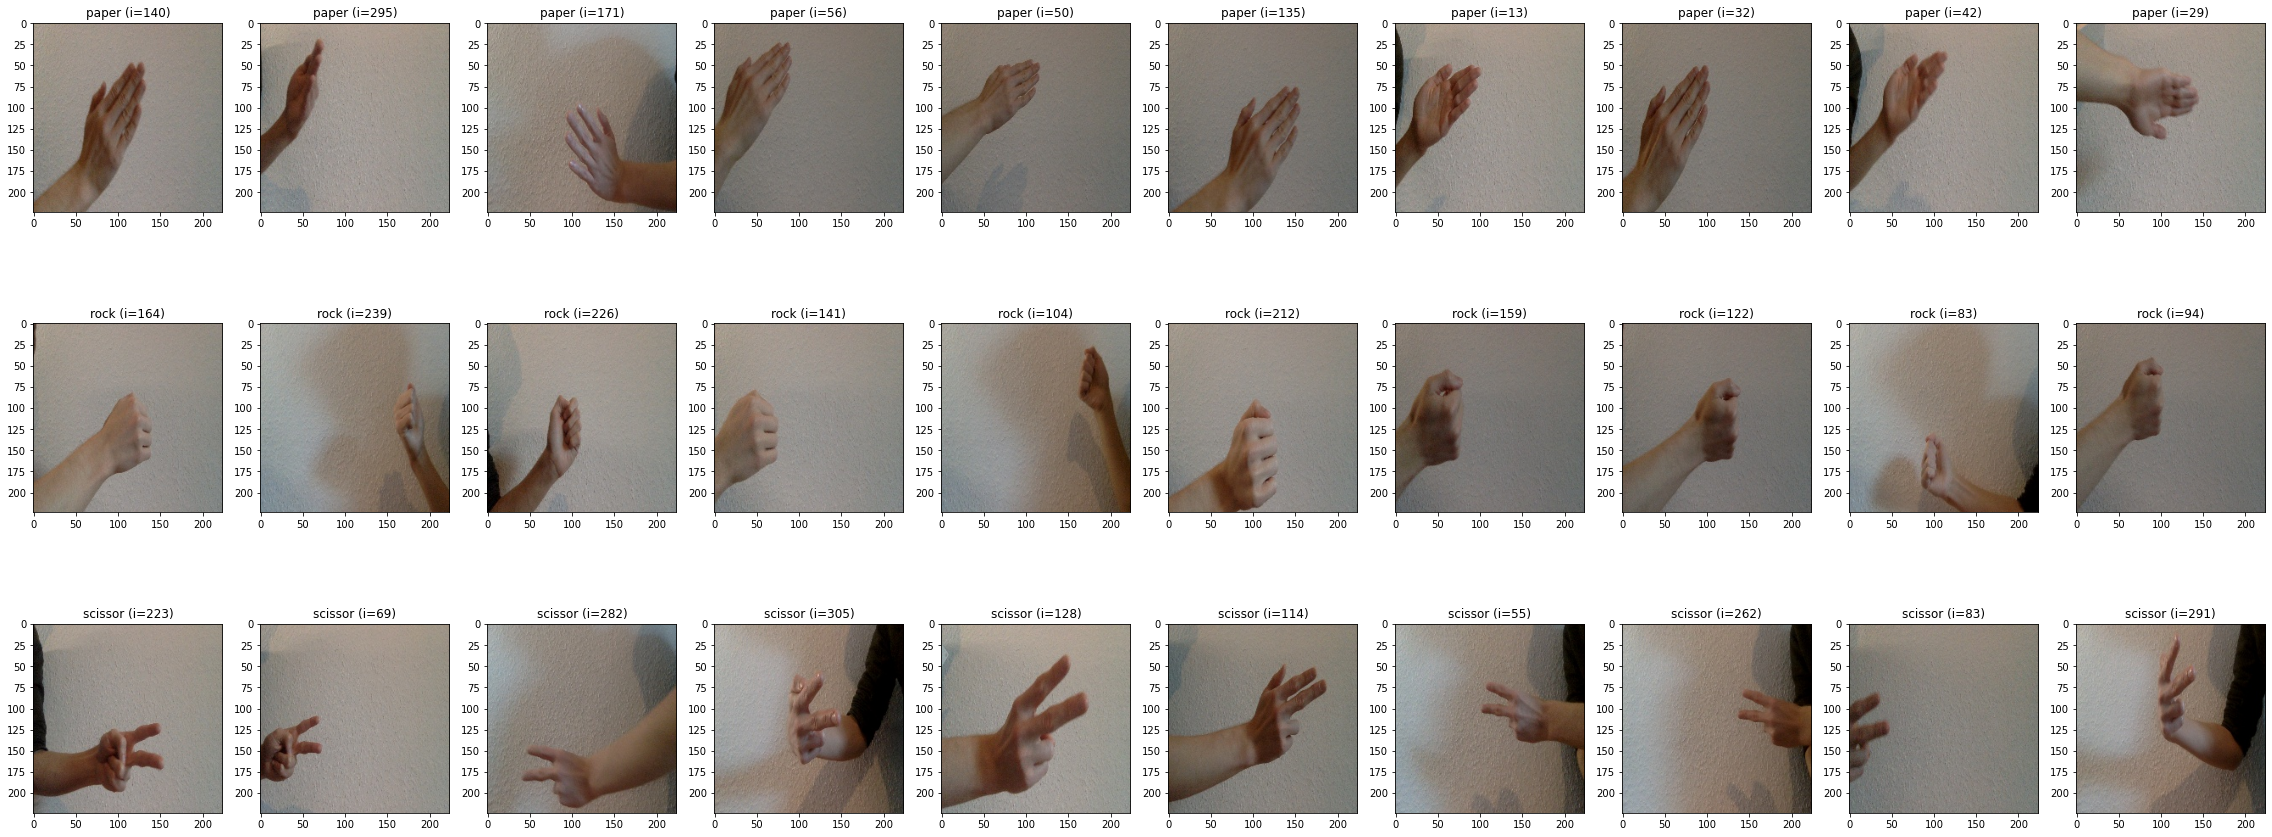

In [46]:
num_classes = len(classes)

plt.figure(figsize=(40,num_classes*5))
ii = 0

for c in range(num_classes):
    for i in range(10):
        ii = ii+1
        o = np.random.randint(0, len(imgs_path[c]))
        
        plt.subplot(3,10,ii)

        img = cv.imread(imgs_path[c][o])
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.subplots_adjust(hspace = .4)

        plt.title(classes[c] + ' (i=' + str(o) + ')')


## How is the images width's and height's?

In [47]:
img_sizes = []

for c in imgs_path:
    for i in c:
        image = Image.open(i)
        w, h = image.size
        img_sizes.append([w,h])

img_sizes = np.array(img_sizes)

In [48]:
print('Minimum width pixels: ' + str(min(img_sizes[:,0])))
print('Minimum height pixels: ' + str(min(img_sizes[:,1])))
print('Maximum width pixels: ' + str(max(img_sizes[:,0])))
print('Maximum height pixels: ' + str(max(img_sizes[:,1])))

Minimum width pixels: 224
Minimum height pixels: 224
Maximum width pixels: 224
Maximum height pixels: 224


# Data Preparation

In [49]:
splitfolders.ratio(input = raw_path, output=split_path, seed=1, ratio=(.6, .2, .2), group_prefix=None) 

Copying files: 903 files [00:01, 455.30 files/s]


In [50]:
for sd in ['Train', 'Test', 'Val']:
    print ('Distribution in ' + sd + ':')
    for c in classes:
        print (c + ': ' + str(len(os.listdir(split_path + '/' + sd + '/' + c))))

Distribution in Train:
paper: 179
rock: 182
scissor: 184
Distribution in Test:
paper: 61
rock: 62
scissor: 63
Distribution in Val:
paper: 63
rock: 64
scissor: 64
